In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_task=pd.read_csv('new_tasks.csv')
df_task.head()

,Task ID,TF-PC1,TF-PC2,TF-PC3,TF-PC4,TF-PC5,TF-PC6,TF-PC7,TF-PC8,TF-PC9,TF-PC10
0,T1,-1.072136,-4.112075,-1.412615,-2.084710,-0.931118,-2.159641,0.697436,0.164752,0.575962,-0.584875
1,T2,-5.582651,0.431089,3.189240,2.135981,-0.576058,-2.989959,1.298395,-0.858811,-1.027600,0.100924
2,T3,-3.408808,-2.285741,-0.368202,-3.470484,0.634106,0.462173,0.271041,-0.044468,0.108393,0.321426
3,T4,-4.533433,-1.437471,1.533813,1.015918,3.259125,-3.447781,1.183841,-0.293245,0.036901,-0.345069
4,T5,-4.566601,0.360550,2.411675,1.378421,-1.357780,-2.068897,2.751120,-0.870225,-1.315924,-0.328792


In [5]:
df_supply=pd.read_csv('new_supplies1.csv')
df_supply.rename(columns={'Supplier': 'Supplier ID'}, inplace=True)
df_supply.head()

,Supplier ID,SF-PC1,SF-PC2,SF-PC3,SF-PC4,SF-PC5,SF-PC6,SF-PC7,SF-PC8,SF-PC9,SF-PC10
0,S1,-0.606217,-0.596125,0.380107,-0.753085,0.290856,0.059941,0.634112,0.392003,0.004154,-0.294537
1,S2,-0.111833,-1.002806,-0.435539,-0.881694,-0.012713,-0.201388,0.738470,1.736313,-0.140499,-0.269732
2,S3,-0.605338,-0.596193,0.381431,-0.755913,0.290945,0.059921,0.634813,0.392129,0.002576,-0.296573
3,S4,-0.649306,-0.592816,0.315245,-0.614512,0.286535,0.060907,0.599797,0.385795,0.081511,-0.194780
4,S5,-0.312686,2.641860,-0.040023,-1.486459,-2.210082,-0.951146,-0.300233,0.805622,0.023375,0.316753


In [31]:
df_cost=pd.read_csv('cost.csv')
df_cost

,Task ID,Supplier ID,Cost
0,T34,S1,0.478219
1,T34,S2,0.444543
2,T34,S3,0.521679
3,T34,S4,0.307331
4,T34,S5,0.357689
...,...,...,...
7675,T130,S60,0.410605
7676,T130,S61,0.410376
7677,T130,S62,0.407884
7678,T130,S63,0.420536


In [33]:
df_cost['Min cost'] = df_cost.groupby('Task ID')['Cost'].transform('min')
df_cost

,Task ID,Supplier ID,Cost,Min cost
0,T34,S1,0.478219,0.290967
1,T34,S2,0.444543,0.290967
2,T34,S3,0.521679,0.290967
3,T34,S4,0.307331,0.290967
4,T34,S5,0.357689,0.290967
...,...,...,...,...
7675,T130,S60,0.410605,0.377868
7676,T130,S61,0.410376,0.377868
7677,T130,S62,0.407884,0.377868
7678,T130,S63,0.420536,0.377868


In [37]:
# Calculate the error for all the suppliers for each tasks
df_cost['Error'] = df_cost['Min cost'] - df_cost['Cost']
df_cost

,Task ID,Supplier ID,Cost,Min cost,Error
0,T34,S1,0.478219,0.290967,-0.187252
1,T34,S2,0.444543,0.290967,-0.153576
2,T34,S3,0.521679,0.290967,-0.230711
3,T34,S4,0.307331,0.290967,-0.016363
4,T34,S5,0.357689,0.290967,-0.066722
...,...,...,...,...,...
7675,T130,S60,0.410605,0.377868,-0.032737
7676,T130,S61,0.410376,0.377868,-0.032508
7677,T130,S62,0.407884,0.377868,-0.030016
7678,T130,S63,0.420536,0.377868,-0.042668


In [59]:
# RMSE for each supplier across all the tasks
RMSE = df_cost.groupby('Supplier ID')[['Error']].apply(lambda x: np.sqrt(np.mean(x**2)))
RMSE

Supplier ID
S1     0.081803
S10    0.037460
S11    0.033735
S12    0.048724
S13    0.039545
         ...   
S63    0.050874
S64    0.040125
S7     0.045649
S8     0.053460
S9     0.051150
Length: 64, dtype: float64

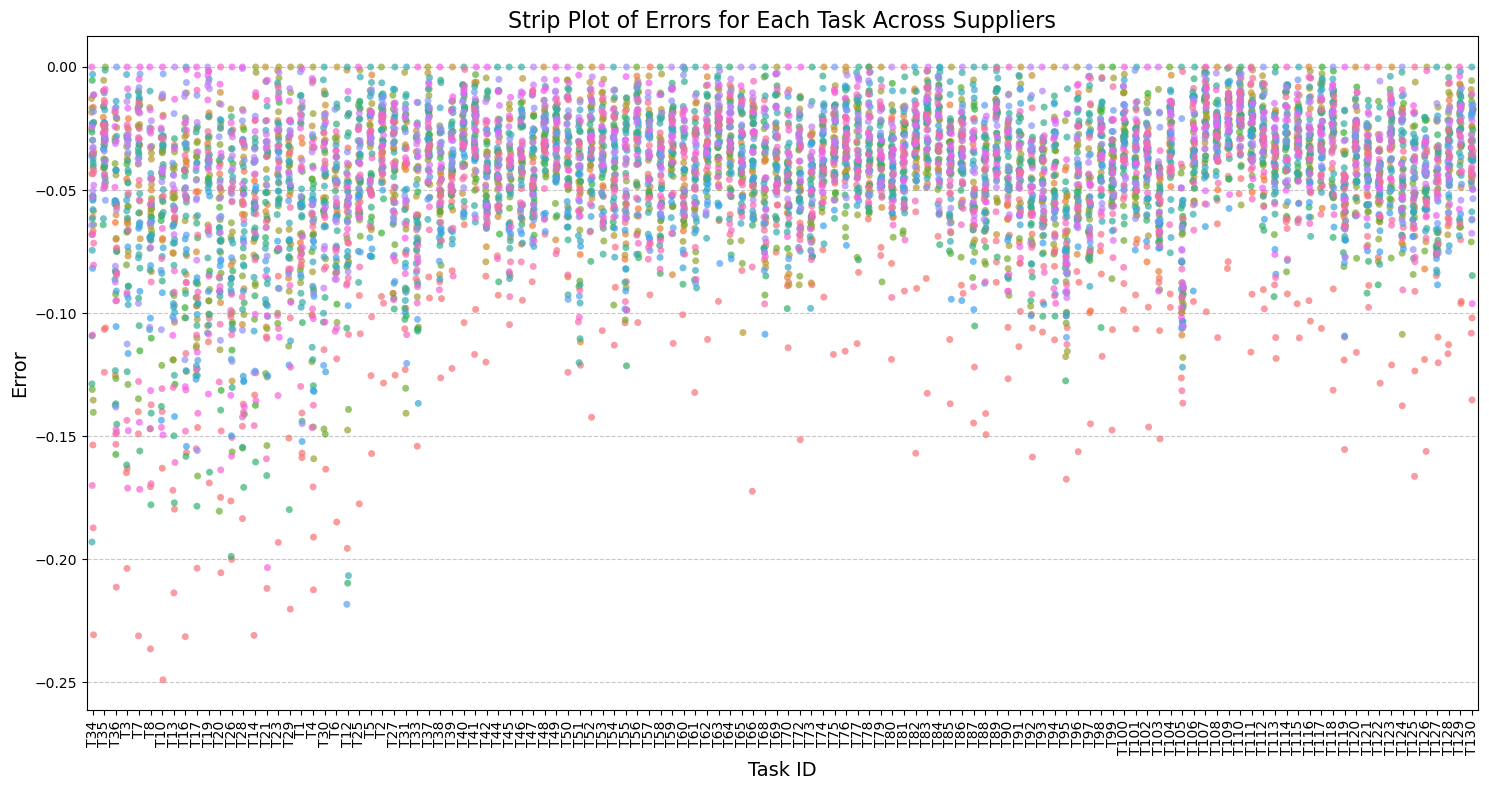

In [93]:
# Strip Plot of Errors for Each Task Across Suppliers
plt.figure(figsize=(15, 8))
sns.stripplot(data=df_cost, x='Task ID', y='Error', jitter=True, alpha=0.7, hue = "Supplier ID", legend = False)
plt.title('Strip Plot of Errors for Each Task Across Suppliers', fontsize=16)
plt.xlabel('Task ID', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

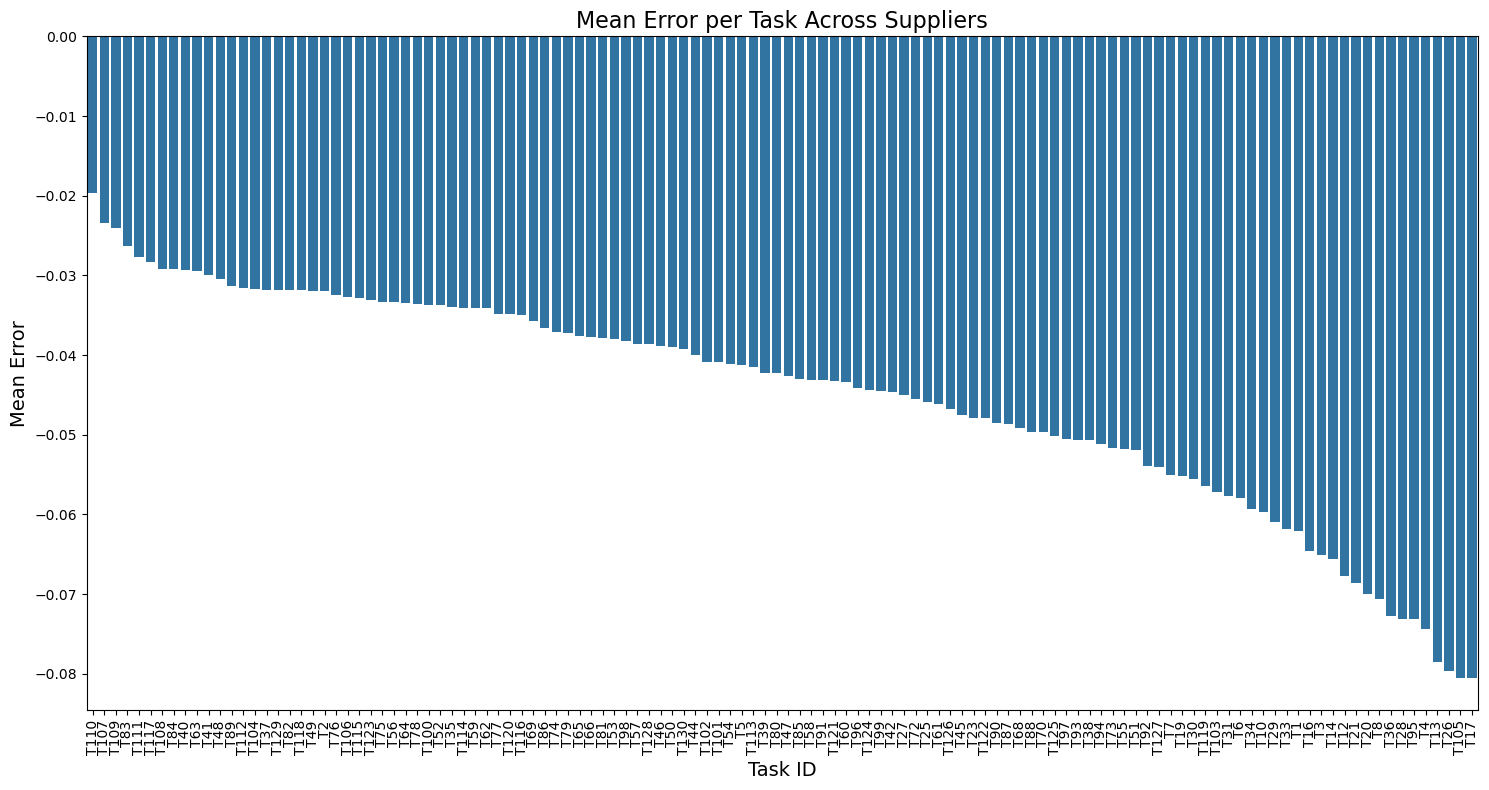

In [101]:
# Compute the mean error per task
task_error_summary = df_cost.groupby('Task ID')['Error'].mean().reset_index()

# Sort tasks by mean error (optional)
task_error_summary = task_error_summary.sort_values('Error', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(data=task_error_summary, x='Task ID', y='Error')
plt.title('Mean Error per Task Across Suppliers', fontsize=16)
plt.xlabel('Task ID', fontsize=14)
plt.ylabel('Mean Error', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()